# 데이터 크롤링

웹 페이지는 기본 적으로 HTML 문서로 구성되어 있다.

이외에 javascript, css도 사용되나 데이터 크롤링에서는 데이터의 내용을 다루는 것으르로 여기서는 HTML 문서를 기본으로 살펴본다.

우선 아래와 같은 라이브러리가 필요하다

In [2]:
from bs4 import BeautifulSoup # 파이썬으로 HTML을 다루기 위한 라이브러리
import requests # 요청을 위한 라이브러리
import time # 시간을 조절하기 위한 라이브러리

(주의) 항성 메인 화면에서 무언가를 검색한 후 해당 페이지의 URL을 가져오기

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A1%9C%EB%98%90

로또 페이지를 가져온 URL

In [5]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A1%9C%EB%98%90'
res = requests.get(url)
res

<Response [200]>

웹페이지를 requests를 통해 가져왔다. 'Respense [200]'이 출력되면 정상적으로 작동한 것

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="로또 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'로또\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'로또\'의 네이버 통합검색 결과입니다."> <title>로또 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/s
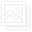
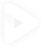
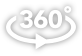
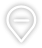

In [7]:
res.text

위와 같이 text를 불려오면 웹 페이지의 html을 가져온다. 하지만 출력결과를 잘 보면 진짜 html 문서가 아닌 양쪽에 '가 있는 text 문서이다. 이를 진짜 html 문서로 변환해보자

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="로또 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'로또'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'로또'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>로또 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_2307
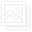
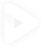
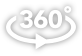
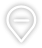

In [8]:
html = BeautifulSoup(res.text)
html